In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from functools import reduce

from fbprophet import Prophet
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [111]:
#function to check stationarity with Adfuller test
def get_adfuller(series, transformation = False):    
    #calculate the 2 years rolling means (average of t-2 for each t)
    moving_avg = series.rolling(window = 2).mean()
    moving_std = series.rolling(window = 2).std()
    orig = plt.plot(series, color = 'black', label = 'Original')
    mean = plt.plot(moving_avg, color = 'red', label = 'Mean')
    std = plt.plot(moving_std, color = 'blue', label = 'Std')
    plt.legend(loc = 'best')    
    if transformation == False:
        plt.title('Before Transformation')        
    else:
        plt.title('After Transformation')        
    plt.show(block = False) 
    result = adfuller(series, autolag = 'AIC')
    print(f'ADF Statistic:{round(result[0],3)} and p-value: {round(result[1],3)}')

#function to make data stationary by taking logarithm of data inputed
def get_stationary(data):    
    return np.log(data)

#function to get prediction for inputed model
def get_prediction(model, model_string):
    
    if model_string == 'ARIMA' or model_string == 'SARIMAX' or model_string == 'VARMAX' or model_string == 'SES' or model_string == 'ES':
        result = model.fit()
        return list(result.forecast(steps=4))
    elif model_string == 'Prophet':
        temp = df.reset_index().rename(columns={'Year': 'ds', 'Deaths':'y'})
        result = model.fit(temp)
        future = result.make_future_dataframe(periods=4)
        return list(result.predict(future))

def get_plot_predictions(predictions):
    b = data[:-4]
    a = b.append(pd.Series(predictions, index = [2017,2018,2019,2020]))
    plt.plot(a)
    plt.plot(data)
    plt.xlim([2010,2020])
    
#return dataframe with difference between prediction and actual data
def get_diff(actual,predicted, model_string):
    
    diff = pd.DataFrame({'Year': actual.index[-4:],
        f'Treatment {model_string}': actual[-4:] - predicted
                        })
    return diff

def get_plot_predictions(predictions):
    a = data[:-4]
    a = a.append(pd.Series(predictions[0], index = [2017,2018,2019,2020]))
    b = data[:-4]
    b = b.append(pd.Series(predictions[1], index = [2017,2018,2019,2020]))
    c = data[:-4]
    c = c.append(pd.Series(predictions[2], index = [2017,2018,2019,2020]))
    
    plt.figure(figsize = (10,5))
    plt.plot(a, color = 'red', linestyle = 'dotted')
    plt.plot(b, color = 'blue', linestyle = 'dotted')
    plt.plot(c, color = 'orange', linestyle = 'dotted')
    plt.plot(data, color = 'black')
    plt.legend(['ARIMA', 'ARIMAX', 'ES', 'Actual'])
    plt.axvline(x = 2017, color = 'grey', linestyle = 'dashdot')
    plt.xlim([2010,2020])
    plt.title('Model Predictions After Treatment')
    plt.xlabel('Years')
    plt.ylabel('Suicide Deaths')

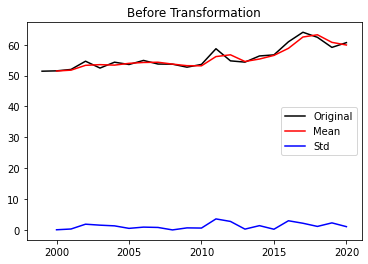

ADF Statistic:-1.397 and p-value: 0.584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74101D-01    |proj g|=  3.41113D-02

At iterate    5    f=  9.45387D-01    |proj g|=  4.76568D-03

At iterate   10    f=  9.39850D-01    |proj g|=  1.26196D-02

At iterate   15    f=  9.38622D-01    |proj g|=  1.29289D-02

At iterate   20    f=  9.37957D-01    |proj g|=  5.68142D-03

At iterate   25    f=  9.37537D-01    |proj g|=  1.12227D-02

At iterate   30    f=  9.37423D-01    |proj g|=  5.61008D-03


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_mode


At iterate   35    f=  9.37229D-01    |proj g|=  1.11072D-02

At iterate   40    f=  9.37135D-01    |proj g|=  4.23830D-03

At iterate   45    f=  9.37074D-01    |proj g|=  1.18405D-02

At iterate   50    f=  9.37016D-01    |proj g|=  3.10538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      1     0     0   3.105D-03   9.370D-01
  F =  0.93701620926322071     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

Initial log joint probability = -55.1121
Iteration  1. Log joint probability =    57.3855. Improved by 112.498.
Iteration  2. Log joint probability =    65.7526. Improved by 

/usr/local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


n 14. Log joint probability =    65.9325. Improved by 0.00180455.
Iteration 15. Log joint probability =    65.9393. Improved by 0.0067778.
Iteration 16. Log joint probability =    65.9525. Improved by 0.0131644.
Iteration 17. Log joint probability =    65.9554. Improved by 0.00294218.
Iteration 18. Log joint probability =    65.9574. Improved by 0.00202373.
Iteration 19. Log joint probability =    65.9607. Improved by 0.00330996.
Iteration 20. Log joint probability =    65.9629. Improved by 0.00212783.
Iteration 21. Log joint probability =    65.9639. Improved by 0.00108463.
Iteration 22. Log joint probability =    65.9645. Improved by 0.000598798.
Iteration 23. Log joint probability =     65.965. Improved by 0.000463775.
Iteration 24. Log joint probability =    65.9657. Improved by 0.000712012.
Iteration 25. Log joint probability =    65.9658. Improved by 6.95795e-05.
Iteration 26. Log joint probability =    65.9659. Improved by 6.16125e-05.
Iteration 27. Log joint probability =    65

/var/folders/92/d911pm8n4r97vjmjk_vvvwfh0000gn/T/ipykernel_72413/3187106582.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.Series(predictions[0], index = [2017,2018,2019,2020]))
/var/folders/92/d911pm8n4r97vjmjk_vvvwfh0000gn/T/ipykernel_72413/3187106582.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(pd.Series(predictions[1], index = [2017,2018,2019,2020]))
/var/folders/92/d911pm8n4r97vjmjk_vvvwfh0000gn/T/ipykernel_72413/3187106582.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(pd.Series(predictions[2], index = [2017,2018,2019,2020]))
/var/folders/92/d911pm8n4r97vjmjk_vvvwfh0000gn/T/ipykernel_72413/3187106582.py:3: FutureWarning: The series.append method is deprecat

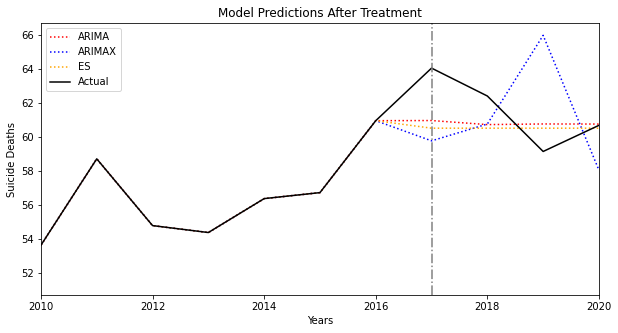

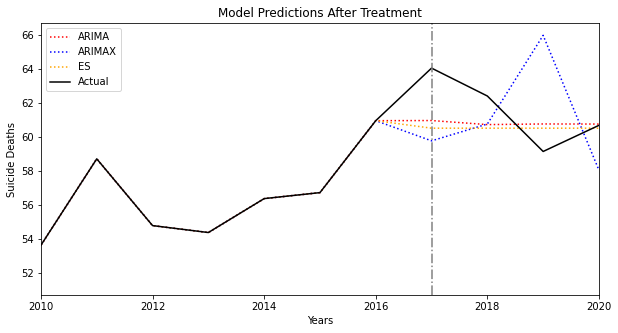

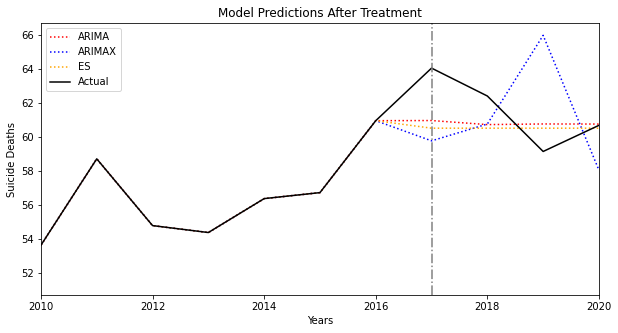

In [215]:
df = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
#Only keep ages between 5-24 years old
df = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '15-24 years')]
#group data by average yearly deaths
df = df.groupby('Year')['Deaths'].mean()
#convert the series back to a dataframe
df = pd.DataFrame(df)

#get adfuller tests with untransformed data
get_adfuller(df['Deaths'])

data = df['Deaths']

#transform data with get_stationary function above
data_transformed = get_stationary(df['Deaths'])

#insert string of model used and its model parameters within the same tuple
models = [
        ('ARIMA', ARIMA(data, order = (1,1,2))),
       ('SARIMAX', sm.tsa.statespace.SARIMAX(data, order=(1, 1, 1),seasonal_order=(1,1,1,12))),
    ('SES', SimpleExpSmoothing(data)),
    ('Prophet',Prophet())
         ]

#iterate through the models variables to get a prediction for 2019,2019,2020 for each of those models 
#then append result to the preds variable
preds = []
for i in models:
    preds.append(tuple([get_prediction(i[1], i[0]), i[0]]))   
    
#iterate over predicted results and call function to get dataframe for all models that we tried and append the result to the list_df 
ind = [2017,2018,2019,2020]
list_df = []
for i in preds[:-1]:
    df = get_diff(data, i[0], i[1])
    df = df.iloc[: , 1:]
    list_df.append(df)

final = reduce(lambda x, y: pd.merge(x, y, on = 'Year'), list_df)

#call graph predictions
for i in preds[:-1]: 
    p = [i[0] for i in preds[:-1]]
    get_plot_predictions(p)


# Arthur's modifs

In [ ]:
df = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
df = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '15-24 years')]
df = df.groupby('Year')['Deaths'].mean()
df = pd.DataFrame(df)

#checking stationarity with Adfuller test
result = adfuller(df['Deaths'])
print("ADFULLER TEST: \n")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#make data stationary
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.Deaths); axes[0, 0].set_title('Original Series')
plt.xlim([2000,2020])
plot_acf(df.Deaths, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Deaths.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Deaths.diff().dropna(), ax=axes[1, 1])

plt.show()



# model = sm.tsa.arima.ARIMA(suicide['Deaths'], order=(1,1,2))
# result = model.fit()
# result.plot_predict(dynamic=False)


# Dania's

In [ ]:
df = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
suicide = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '15-24 years')]
series = suicide.groupby('Year')['Deaths'].mean()
series.plot()
series.head()

In [ ]:
timeseries = series
timeseries.rolling(2).mean().plot(label='rolling mean')
timeseries.rolling(2).std().plot(label='rolling std')
timeseries.plot()
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print(label+':'+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
        
check_adf(series)

In [ ]:
#something = series['Deaths First Difference']
suicide['Deaths First Difference'] = suicide['Deaths'] - suicide['Deaths'].shift(1)
print(suicide['Deaths First Difference'])
check_adf(suicide['Deaths First Difference'].dropna()) #['Deaths First Difference'].dropna())
suicide['Deaths First Difference'].plot()

In [ ]:
# suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
# print(suicide)
# suicide['Year'] = pd.to_datetime(suicide['Year'], infer_datetime_format=True)
# indexedSuicide = suicide.set_index(['Year'])

In [ ]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
series = suicide.groupby('Year')['Deaths'].mean()
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
model_fit.plot_predict(dynamic=False)

In [ ]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
#series = suicide.groupby('Year')['Deaths'].mean()
#print(series)

#df = suicide[['State', 'Year','Ten-Year Age Groups', 'Gender', 'Crude Rate', 'Population','Deaths']]

#df = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '5-14 years')]

# print(suicide[suicide['Ten-Year Age Groups'] == '5-14 years'])

suicide = suicide[(suicide['Ten-Year Age Groups'] == '5-14 years') | (suicide['Ten-Year Age Groups'] == '15-24 years')]
series = suicide.groupby('Year')['Deaths'].mean()
result = adfuller(series)
#result = adfuller(suicide['Deaths'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)

class(dat$suicide)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(suicide.groupby('Year')['Deaths'].mean(), order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(suicide.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(suicide.diff().dropna(), ax=axes[1])

plt.show()